In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
%cd /content/drive/MyDrive/YS_YOA

/content/drive/MyDrive/YS_YOA


In [ ]:
#human DDX3X와 human DDX6를 분석해보고 비교해보기; 기능상반..
#ENCODE 웹사이트에서 수동 다운로드 후, Colab에 업로드

In [ ]:
!gunzip DDX3X_K562_eCLIP.bed.gz
!gunzip DDX6_K562_eCLIP.bed.gz

In [32]:
import pandas as pd

ddx3x_bed = pd.read_csv('DDX3X_K562_eCLIP.bed', sep='\t', header=None)
ddx6_bed = pd.read_csv('DDX6_K562_eCLIP.bed', sep='\t', header=None)

# 컬럼 이름 지정 (narrowPeak 포맷 기준)
columns = [
    'chr', 'start', 'end', 'name', 'score', 'strand',
    'signalValue', 'pValue', 'qValue', 'peak'
]
ddx3x_bed.columns = columns
ddx6_bed.columns = columns

# 파일 미리보기
print('DDX3X:')
print(ddx3x_bed.head())
print('\nDDX6:')
print(ddx6_bed.head())

DDX3X:
     chr      start        end            name  score strand  signalValue  \
0  chr11   94973496   94973570  DDX3X_K562_IDR   1000      -     3.466426   
1  chr22   40819227   40819349  DDX3X_K562_IDR   1000      -     3.318698   
2  chr22   40819194   40819227  DDX3X_K562_IDR   1000      -     3.073488   
3   chrX   63351168   63351323  DDX3X_K562_IDR   1000      -     4.085411   
4   chr2  112584599  112584650  DDX3X_K562_IDR   1000      +     4.551388   

     pValue  qValue  peak  
0  4.474207      -1    -1  
1  8.519145      -1    -1  
2  3.550105      -1    -1  
3  9.051959      -1    -1  
4  6.486314      -1    -1  

DDX6:
     chr     start       end           name  score strand  signalValue  \
0   chr6  44155262  44155329  DDX6_K562_IDR   1000      +     3.999091   
1  chr17  82852855  82852920  DDX6_K562_IDR   1000      +     3.439095   
2   chr1   1335439   1335500  DDX6_K562_IDR   1000      -     4.534286   
3   chr1   1335309   1335383  DDX6_K562_IDR   1000      -  

In [34]:
#GTF annotation으로 UTR/CDS mapping
!wget https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_38/gencode.v38.annotation.gtf.gz
!gunzip gencode.v38.annotation.gtf.gz

--2025-06-12 11:58:11--  https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_38/gencode.v38.annotation.gtf.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46556621 (44M) [application/x-gzip]
Saving to: ‘gencode.v38.annotation.gtf.gz’

gencode.v38.annotat 100%[===================>]  44.40M  13.5MB/s    in 3.3s    

2025-06-12 11:58:15 (13.5 MB/s) - ‘gencode.v38.annotation.gtf.gz’ saved [46556621/46556621]



In [35]:
!head gencode.v38.annotation.gtf

##description: evidence-based annotation of the human genome (GRCh38), version 38 (Ensembl 104)
##provider: GENCODE
##contact: gencode-help@ebi.ac.uk
##format: gtf
##date: 2021-03-12
chr1	HAVANA	gene	11869	14409	.	+	.	gene_id "ENSG00000223972.5"; gene_type "transcribed_unprocessed_pseudogene"; gene_name "DDX11L1"; level 2; hgnc_id "HGNC:37102"; havana_gene "OTTHUMG00000000961.2";
chr1	HAVANA	transcript	11869	14409	.	+	.	gene_id "ENSG00000223972.5"; transcript_id "ENST00000456328.2"; gene_type "transcribed_unprocessed_pseudogene"; gene_name "DDX11L1"; transcript_type "processed_transcript"; transcript_name "DDX11L1-202"; level 2; transcript_support_level "1"; hgnc_id "HGNC:37102"; tag "basic"; havana_gene "OTTHUMG00000000961.2"; havana_transcript "OTTHUMT00000362751.1";
chr1	HAVANA	exon	11869	12227	.	+	.	gene_id "ENSG00000223972.5"; transcript_id "ENST00000456328.2"; gene_type "transcribed_unprocessed_pseudogene"; gene_name "DDX11L1"; transcript_type "processed_transcript"; transcript_n

In [36]:
!grep -o 'gene_type "[^"]*"' gencode.v38.annotation.gtf | cut -d'"' -f2 | sort | uniq

IG_C_gene
IG_C_pseudogene
IG_D_gene
IG_J_gene
IG_J_pseudogene
IG_pseudogene
IG_V_gene
IG_V_pseudogene
lncRNA
miRNA
misc_RNA
Mt_rRNA
Mt_tRNA
polymorphic_pseudogene
processed_pseudogene
protein_coding
pseudogene
ribozyme
rRNA
rRNA_pseudogene
scaRNA
scRNA
snoRNA
snRNA
sRNA
TEC
transcribed_processed_pseudogene
transcribed_unitary_pseudogene
transcribed_unprocessed_pseudogene
translated_processed_pseudogene
translated_unprocessed_pseudogene
TR_C_gene
TR_D_gene
TR_J_gene
TR_J_pseudogene
TR_V_gene
TR_V_pseudogene
unitary_pseudogene
unprocessed_pseudogene
vault_RNA


In [37]:
!grep 'gene_type "rRNA"' gencode.v38.annotation.gtf | head

chr1	ENSEMBL	gene	143439605	143439714	.	+	.	gene_id "ENSG00000252830.2"; gene_type "rRNA"; gene_name "RNA5SP533"; level 3; hgnc_id "HGNC:53802";
chr1	ENSEMBL	transcript	143439605	143439714	.	+	.	gene_id "ENSG00000252830.2"; transcript_id "ENST00000517021.2"; gene_type "rRNA"; gene_name "RNA5SP533"; transcript_type "rRNA"; transcript_name "RNA5SP533-201"; level 3; transcript_support_level "NA"; hgnc_id "HGNC:53802"; tag "basic"; tag "Ensembl_canonical";
chr1	ENSEMBL	exon	143439605	143439714	.	+	.	gene_id "ENSG00000252830.2"; transcript_id "ENST00000517021.2"; gene_type "rRNA"; gene_name "RNA5SP533"; transcript_type "rRNA"; transcript_name "RNA5SP533-201"; exon_number 1; exon_id "ENSE00002089298.2"; level 3; transcript_support_level "NA"; hgnc_id "HGNC:53802"; tag "basic"; tag "Ensembl_canonical";
chr1	ENSEMBL	gene	144265217	144265326	.	+	.	gene_id "ENSG00000276442.1"; gene_type "rRNA"; gene_name "RNA5SP529"; level 3; hgnc_id "HGNC:53798";
chr1	ENSEMBL	transcript	144265217	144265326	.	+	

1. CDS 분류
2. 5'UTR, 3'UTR 분류
3. Intron 분류
4. rRNA, snoRNA, miRNA
5. 나머지 others로 분류

GTF annotation에서 gene_type "rRNA"가 gene/transcript/exon 등 여러 feature에 동시에 나오는데, 이럴 때 eCLIP peak와 겹치는 구간을 rRNA로 어떻게 정의...
gene, transcript, exon 등 gene_type이 "rRNA"인 모든 feature를 합친 bed파일(rRNA_union.bed) 생성

bedtools merge로 겹치는 부분 합치기, eCLIP peak와 intersect


In [38]:
#CDS 분류

# pybedtools 설치
!pip install pybedtools

import pybedtools

# GTF에서 원하는 feature 추출 함수
def extract_feature_bed(gtf_file, feature, out_bed):
    bt = pybedtools.BedTool(gtf_file)
    extracted = bt.filter(lambda x: x[2] == feature)
    extracted.saveas(out_bed)

# 추출
extract_feature_bed('gencode.v38.annotation.gtf', 'CDS', 'CDS_v38.bed')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 95.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 71.0 MB/s eta 0:00:00
  Created wheel for pybedtools: filename=pybedtools-0.12.0-cp311-cp311-linux_x86_64.whl size=14261451 sha256=93cae8faa1ff59b576eb5542946055b557c7debbc9e4a2d06eefd48924abd141
  Stored in directory: /root/.cache/pip/wheels/95/62/57/e8c47c2a43884227b6644cf1d2dabf3162a0f40b9c1493c1f5
Successfully built pybedtools


In [39]:
#5'UTR/3'UTR annotation 먼저
import pandas as pd


gtf = pd.read_csv("gencode.v38.annotation.gtf", sep="\t", comment="#", header=None,
                  names=["chr", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"])

# UTR/ CDS만 추출
utr = gtf[gtf["feature"] == "UTR"].copy()
cds = gtf[gtf["feature"] == "CDS"].copy()

# transcript_id 추출 함수
def extract_transcript_id(attr):
    for entry in attr.split(";"):
        if "transcript_id" in entry:
            return entry.split('"')[1]
    return None

utr["transcript_id"] = utr["attribute"].apply(extract_transcript_id)
cds["transcript_id"] = cds["attribute"].apply(extract_transcript_id)

# CDS 시작/끝 좌표 집계
cds_range = cds.groupby("transcript_id")[["start", "end"]].agg(["min", "max"])
cds_range.columns = ['start_min', 'start_max', 'end_min', 'end_max']
cds_range["cds_start"] = cds_range[["start_min", "end_min"]].min(axis=1)
cds_range["cds_end"] = cds_range[["start_max", "end_max"]].max(axis=1)
cds_range = cds_range[["cds_start", "cds_end"]]

# UTR에 merge
utr = utr.merge(cds_range, on="transcript_id", how="left")

# strand, CDS 위치 기반 5'/3' 구분 함수
def label_utr(row):
    if pd.isna(row["cds_start"]) or pd.isna(row["cds_end"]):
        return "unknown"
    if row["strand"] == "+":
        return "5UTR" if row["end"] < row["cds_start"] else "3UTR"
    else:
        return "3UTR" if row["start"] > row["cds_end"] else "5UTR"

utr["UTR_type"] = utr.apply(label_utr, axis=1)

# BED 포맷 저장
utr_bed = utr[["chr", "start", "end", "transcript_id", "score", "strand", "UTR_type"]]
utr_bed.to_csv("annotated_UTRs_v38.bed", sep="\t", index=False, header=False)


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [18]:
!awk '$7=="5UTR"' annotated_UTRs_v38.bed > five_utr_v38.bed
!awk '$7=="3UTR"' annotated_UTRs_v38.bed > three_utr_v38.bed

In [19]:
!head five_utr_v38.bed
!head three_utr_v38.bed
#겹치는 부분 발생

chr1	65419	65433	ENST00000641515.2	.	+	5UTR
chr1	65520	65564	ENST00000641515.2	.	+	5UTR
chr1	450740	450742	ENST00000426406.4	.	-	5UTR
chr1	685679	685718	ENST00000332831.4	.	-	5UTR
chr1	923923	924431	ENST00000616016.5	.	+	5UTR
chr1	923923	924431	ENST00000618323.5	.	+	5UTR
chr1	925150	925189	ENST00000437963.5	.	+	5UTR
chr1	925922	925941	ENST00000437963.5	.	+	5UTR
chr1	925731	925800	ENST00000342066.8	.	+	5UTR
chr1	925922	925941	ENST00000342066.8	.	+	5UTR
chr1	70006	71585	ENST00000641515.2	.	+	3UTR
chr1	686655	686673	ENST00000332831.4	.	-	3UTR
chr1	944151	944574	ENST00000616016.5	.	+	3UTR
chr1	944151	944574	ENST00000618323.5	.	+	3UTR
chr1	944151	944574	ENST00000342066.8	.	+	3UTR
chr1	944151	944153	ENST00000616125.5	.	+	3UTR
chr1	944151	944153	ENST00000618779.5	.	+	3UTR
chr1	944151	944153	ENST00000622503.5	.	+	3UTR
chr1	944151	944153	ENST00000618181.5	.	+	3UTR
chr1	944151	944153	ENST00000617307.5	.	+	3UTR


In [25]:
# pybedtools 설치
!apt-get install -y bedtools


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 563 kB of archives.
After this operation, 1,548 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 bedtools amd64 2.30.0+dfsg-2ubuntu0.1 [563 kB]
Fetched 563 kB in 1s (634 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../bedtools_2.30.0+dfsg-2ubuntu0.1_amd64.deb ...
Unpacking bedtools (2.30.0+dfsg-2ubuntu0.1) ...
Setting up bedtools (2.30.0+dfsg-2ubuntu0.1) ...


In [40]:
#겹치는 부분 제거 (추후 다 해보기))
import pybedtools

!bedtools sort -i five_utr_v38.bed | bedtools merge -i - > five_utr_v38_merged.bed
!bedtools sort -i three_utr_v38.bed | bedtools merge -i - > three_utr_v38_merged.bed
!bedtools sort -i CDS_v38.bed | bedtools merge -i - > CDS_v38_merged.bed


In [41]:
!wc -l CDS_v38.bed
!wc -l CDS_v38_merged.bed


825028 CDS_v38.bed
212029 CDS_v38_merged.bed


In [52]:
%%bash
for type in miRNA rRNA snRNA snoRNA; do
    grep "gene_type \"$type\"" gencode.v38.annotation.gtf > ${type}.gtf
    awk 'BEGIN{OFS="\t"} $1 !~ /^#/ && $3 != "CDS" && $3 !~ /UTR/ {print $1, $4-1, $5, $10, ".", $7}' ${type}.gtf > ${type}.bed
done

grep -v -e 'gene_type "miRNA"' \
        -e 'gene_type "rRNA"' \
        -e 'gene_type "snRNA"' \
        -e 'gene_type "snoRNA"' \
        gencode.v38.annotation.gtf > others.gtf

awk 'BEGIN{OFS="\t"} $1 !~ /^#/ && $3 != "CDS" && $3 !~ /UTR/ {print $1, $4-1, $5, $10, ".", $7}' others.gtf > others.bed

In [65]:
!bedtools sort -i miRNA.bed | bedtools merge -i - > miRNA_merged.bed
!bedtools sort -i rRNA.bed | bedtools merge -i - > rRNA_merged.bed
!bedtools sort -i snRNA.bed | bedtools merge -i - > snRNA_merged.bed
!bedtools sort -i snoRNA.bed | bedtools merge -i - > snoRNA_merged.bed
!bedtools sort -i others.bed | bedtools merge -i - > others_merged.bed

In [66]:
!wc -l miRNA.bed
!wc -l miRNA_merged.bed
!wc -l rRNA.bed
!wc -l rRNA_merged.bed
!wc -l snRNA.bed
!wc -l snRNA_merged.bed
!wc -l snoRNA.bed
!wc -l snRNA_merged.bed
!wc -l others.bed
!wc -l others_merged.bed
#겹치는 부분 다 merge 완료

5637 miRNA.bed
1822 miRNA_merged.bed
141 rRNA.bed
47 rRNA_merged.bed
5703 snRNA.bed
1901 snRNA_merged.bed
2829 snoRNA.bed
1901 snRNA_merged.bed
1961684 others.bed
31471 others_merged.bed


In [67]:
#DDX3X와 DDX6

#DDX3X
# 5'UTR
!bedtools intersect -a DDX3X_K562_eCLIP.bed -b five_utr_v38_merged.bed -u | wc -l
# 3'UTR
!bedtools intersect -a DDX3X_K562_eCLIP.bed -b three_utr_v38_merged.bed -u | wc -l
# CDS
!bedtools intersect -a DDX3X_K562_eCLIP.bed -b CDS_v38_merged.bed -u | wc -l
# miRNA
!bedtools intersect -a DDX3X_K562_eCLIP.bed -b miRNA_merged.bed -u | wc -l
# rRNA
!bedtools intersect -a DDX3X_K562_eCLIP.bed -b rRNA_merged.bed -u | wc -l
# snRNA
!bedtools intersect -a DDX3X_K562_eCLIP.bed -b snRNA_merged.bed -u | wc -l
# snoRNA
!bedtools intersect -a DDX3X_K562_eCLIP.bed -b snoRNA_merged.bed -u | wc -l
# others
!bedtools intersect -a DDX3X_K562_eCLIP.bed -b others_merged.bed -u | wc -l


2808
2722
3831
18
0
3
0
6676


In [68]:
#DDX6
# 5'UTR
!bedtools intersect -a DDX6_K562_eCLIP.bed -b five_utr_v38_merged.bed -u | wc -l
# 3'UTR
!bedtools intersect -a DDX6_K562_eCLIP.bed -b three_utr_v38_merged.bed -u | wc -l
# CDS
!bedtools intersect -a DDX6_K562_eCLIP.bed -b CDS_v38_merged.bed -u | wc -l
# miRNA
!bedtools intersect -a DDX6_K562_eCLIP.bed -b miRNA_merged.bed -u | wc -l
# rRNA
!bedtools intersect -a DDX6_K562_eCLIP.bed -b rRNA_merged.bed -u | wc -l
# snRNA
!bedtools intersect -a DDX6_K562_eCLIP.bed -b snRNA_merged.bed -u | wc -l
# snoRNA
!bedtools intersect -a DDX6_K562_eCLIP.bed -b snoRNA_merged.bed -u | wc -l
# others
!bedtools intersect -a DDX6_K562_eCLIP.bed -b others_merged.bed -u | wc -l


681
778
361
3
0
0
1
1955


      DDX3X /  DDX6

5'UTR: 2808 / 681

3'UTR: 2722 / 778

CDS: 3831 / 361

miRNA: 18 / 3

rRNA: 0 / 0

snRNA: 3 / 0

snoRNA: 0 / 1

Others: 6676 / 1955


In [70]:
# 카운트 값 입력 (위 값 예시)
counts = [2808, 2722, 3831, 18, 0, 3, 0, 6676]
labels = [
    "5' UTR", "3' UTR", "CDS", "miRNA", "rRNA", "snRNA", "snoRNA", "Others"
]
total = sum(counts)
print("Total:", total)


Total: 16058


In [71]:
percentages = [c / total * 100 for c in counts]
for label, count, pct in zip(labels, counts, percentages):
    print(f"{label}: {count} ({pct:.2f}%)")


5' UTR: 2808 (17.49%)
3' UTR: 2722 (16.95%)
CDS: 3831 (23.86%)
miRNA: 18 (0.11%)
rRNA: 0 (0.00%)
snRNA: 3 (0.02%)
snoRNA: 0 (0.00%)
Others: 6676 (41.57%)


'#4465A2'(blue)
    '#37B4AA'(teal)
    '#90D2C7'(mint)
    '#F7B500'(orange)
    '#C7B083'(light brown)
    '#7E7367'(gray)
    '#545251'(dark gray)
    '#BAB57C' (olive)

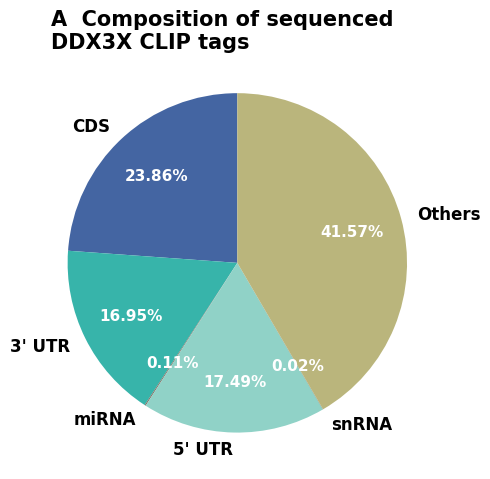

In [35]:
#DDX3X CLIP tags
import matplotlib.pyplot as plt

# 데이터 카운트 비율

labels = [
    "CDS", "3' UTR", "miRNA", "5' UTR", "snRNA", "Others"
]
sizes = [
    23.86, 16.95, 0.11, 17.49, 0.02, 41.57
]


colors = [
    '#4465A2',  # CDS (blue)
    '#37B4AA',  # 3' UTR (teal)
    '#7E7367',  # miRNA (gray)
    '#90D2C7',  #5' UTR (mint)
    '#545251',  # snRNA (dark gray)
    '#BAB57C'   # Others (olive)
]

fig, ax = plt.subplots(figsize=(5, 5))

wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, colors=colors,
    autopct='%1.2f%%', startangle=90, pctdistance=0.7,
    textprops={'fontsize': 12}
)

# A. 레이블 강조
plt.setp(autotexts, size=11, weight="bold", color='white')
plt.setp(texts, size=12, weight="bold")

# 논문 스타일 제목/굵은 글씨
ax.set_title("A  Composition of sequenced\nDDX3X CLIP tags", fontsize=15, fontweight='bold', loc='left')

# 파이 차트 원이 완전히 원형이 되도록
plt.axis('equal')
plt.tight_layout()
plt.show()


In [38]:
# DDX6 카운트 값 입력
counts = [681, 778, 361, 3, 0, 0, 1, 1955]
labels = [
    "5' UTR", "3' UTR", "CDS", "miRNA", "rRNA", "snRNA", "snoRNA", "Others"
]
total = sum(counts)
print("Total:", total)

percentages = [c / total * 100 for c in counts]
for label, count, pct in zip(labels, counts, percentages):
    print(f"{label}: {count} ({pct:.2f}%)")

Total: 3779
5' UTR: 681 (18.02%)
3' UTR: 778 (20.59%)
CDS: 361 (9.55%)
miRNA: 3 (0.08%)
rRNA: 0 (0.00%)
snRNA: 0 (0.00%)
snoRNA: 1 (0.03%)
Others: 1955 (51.73%)


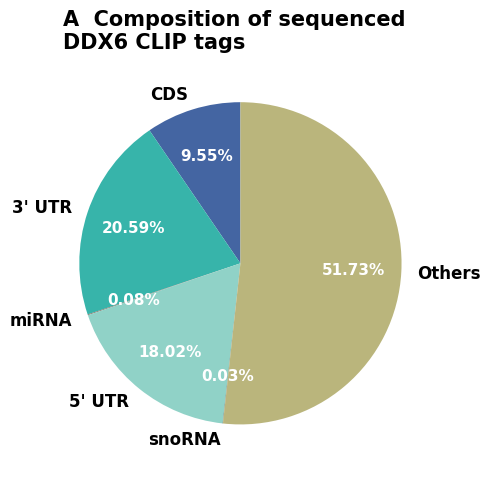

In [39]:
#DDX6 CLIP tags
import matplotlib.pyplot as plt

# 데이터 카운트 비율

labels = [
    "CDS", "3' UTR", "miRNA", "5' UTR", "snoRNA", "Others"
]
sizes = [
    9.55, 20.59, 0.08, 18.02, 0.03, 51.73
]


colors = [
    '#4465A2',  # CDS (blue)
    '#37B4AA',  # 3' UTR (teal)
    '#7E7367',  # miRNA (gray)
    '#90D2C7',  #5' UTR (mint)
    '#545251',  # snoRNA (dark gray)
    '#BAB57C'   # Others (olive)
]

fig, ax = plt.subplots(figsize=(5, 5))

wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, colors=colors,
    autopct='%1.2f%%', startangle=90, pctdistance=0.7,
    textprops={'fontsize': 12}
)

# A. 레이블 강조
plt.setp(autotexts, size=11, weight="bold", color='white')
plt.setp(texts, size=12, weight="bold")

# 논문 스타일 제목/굵은 글씨
ax.set_title("A  Composition of sequenced\nDDX6 CLIP tags", fontsize=15, fontweight='bold', loc='left')

# 파이 차트 원이 완전히 원형이 되도록
plt.axis('equal')
plt.tight_layout()
plt.show()


타겟 mRNA가 암호화하는 단백질의 annotated localization 기준

In [5]:
# pybedtools 설치
!pip install pybedtools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 109.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 79.5 MB/s eta 0:00:00
  Created wheel for pybedtools: filename=pybedtools-0.12.0-cp311-cp311-linux_x86_64.whl size=14261452 sha256=8fbe9a6b001c5c30cc3b48b1468c2e3b462ef629c7fbf787ab3f30635414f6e7
  Stored in directory: /root/.cache/pip/wheels/95/62/57/e8c47c2a43884227b6644cf1d2dabf3162a0f40b9c1493c1f5
Successfully built pybedtools


In [ ]:
#DDX3X. 파이썬으로 gene_name 리스트 추출 (중복제거 포함)
import pandas as pd

# bedtools intersect로 뽑은 결과 파일
df = pd.read_csv('DDX3X_clip_gene_annot.txt', sep='\t', header=None, comment='#')
# gtf annotation 컬럼: 일반적으로 마지막 컬럼(= -1)
gtf_attr = df.iloc[:, -1]

def extract_gene_name(attr):
    for entry in attr.split(';'):
        if 'gene_name' in entry:
            return entry.split('"')[1]
    return None

gene_names = gtf_attr.apply(extract_gene_name).dropna().unique().tolist()

# 파일로 저장 (UniProt 등 annotation pipeline에서 사용 가능)
with open('DDX3X_targets_gene_list.txt', 'w') as f:
    for g in gene_names:
        f.write(g+'\n')

#DDX6. 파이썬으로 gene_name 리스트 추출 (중복제거 포함)
import pandas as pd

# bedtools intersect로 뽑은 결과 파일
df = pd.read_csv('DDX6_clip_gene_annot.txt', sep='\t', header=None, comment='#')
# gtf annotation 컬럼: 일반적으로 마지막 컬럼(= -1)
gtf_attr = df.iloc[:, -1]

def extract_gene_name(attr):
    for entry in attr.split(';'):
        if 'gene_name' in entry:
            return entry.split('"')[1]
    return None

gene_names = gtf_attr.apply(extract_gene_name).dropna().unique().tolist()

# 파일로 저장 (UniProt 등 annotation pipeline에서 사용 가능)
with open('DDX6_targets_gene_list.txt', 'w') as f:
    for g in gene_names:
        f.write(g+'\n')


이제부터 GO 분석..!!

In [28]:
!pip install gseapy
import gseapy as gp



공통 GO term (2개):
 {'gene expression (GO:0010467)', 'mRNA processing (GO:0006397)'}

DDX3X unique (3개):
 {'cellular macromolecule biosynthetic process (GO:0034645)', 'translation (GO:0006412)', 'mRNA splicing, via spliceosome (GO:0000398)'}

DDX6 unique (3개):
 {'nuclear-transcribed mRNA catabolic process, nonsense-mediated decay (GO:0000184)', 'protein targeting to ER (GO:0045047)', 'cotranslational protein targeting to membrane (GO:0006613)'}


In [40]:
# 결과 데이터프레임
bp_ddx3x = all_results['DDX3X_GO_Biological_Process_2021']
bp_ddx6  = all_results['DDX6_GO_Biological_Process_2021']

# term id 컬럼이 있다면 'GO ID', 없으면 'Term'만으로 비교 (gseapy는 보통 'Term' 컬럼만 있음)
term_col = 'Term'

# top N(예: 10개) 기준 비교
topN = 5
terms_ddx3x = set(bp_ddx3x[term_col].head(topN))
terms_ddx6  = set(bp_ddx6[term_col].head(topN))

# 공통, unique 자동 구분
common_terms = terms_ddx3x & terms_ddx6
ddx3x_unique = terms_ddx3x - terms_ddx6
ddx6_unique  = terms_ddx6 - terms_ddx3x

print(f"공통 GO term ({len(common_terms)}개):\n", common_terms)
print(f"\nDDX3X unique ({len(ddx3x_unique)}개):\n", ddx3x_unique)
print(f"\nDDX6 unique ({len(ddx6_unique)}개):\n", ddx6_unique)


공통 GO term (2개):
 {'gene expression (GO:0010467)', 'mRNA processing (GO:0006397)'}

DDX3X unique (3개):
 {'cellular macromolecule biosynthetic process (GO:0034645)', 'translation (GO:0006412)', 'mRNA splicing, via spliceosome (GO:0000398)'}

DDX6 unique (3개):
 {'nuclear-transcribed mRNA catabolic process, nonsense-mediated decay (GO:0000184)', 'protein targeting to ER (GO:0045047)', 'cotranslational protein targeting to membrane (GO:0006613)'}


In [41]:
summary = []
for term in common_terms:
    row_x = bp_ddx3x[bp_ddx3x[term_col] == term].iloc[0]
    row_6 = bp_ddx6[bp_ddx6[term_col] == term].iloc[0]
    summary.append({
        "Term": term,
        "DDX3X FDR": row_x['Adjusted P-value'],
        "DDX6 FDR":  row_6['Adjusted P-value'],
        "Common/Unique": "Common"
    })
for term in ddx3x_unique:
    row_x = bp_ddx3x[bp_ddx3x[term_col] == term].iloc[0]
    summary.append({
        "Term": term,
        "DDX3X FDR": row_x['Adjusted P-value'],
        "DDX6 FDR":  None,
        "Common/Unique": "DDX3X only"
    })
for term in ddx6_unique:
    row_6 = bp_ddx6[bp_ddx6[term_col] == term].iloc[0]
    summary.append({
        "Term": term,
        "DDX3X FDR": None,
        "DDX6 FDR":  row_6['Adjusted P-value'],
        "Common/Unique": "DDX6 only"
    })

import pandas as pd
df_summary = pd.DataFrame(summary)
print(df_summary)


                                                Term     DDX3X FDR  \
0                       gene expression (GO:0010467)  5.444076e-36   
1                       mRNA processing (GO:0006397)  7.240108e-27   
2  cellular macromolecule biosynthetic process (G...  2.285735e-28   
3                           translation (GO:0006412)  6.428487e-28   
4        mRNA splicing, via spliceosome (GO:0000398)  1.509730e-26   
5  nuclear-transcribed mRNA catabolic process, no...           NaN   
6               protein targeting to ER (GO:0045047)           NaN   
7  cotranslational protein targeting to membrane ...           NaN   

       DDX6 FDR Common/Unique  
0  3.575506e-07        Common  
1  3.698041e-05        Common  
2           NaN    DDX3X only  
3           NaN    DDX3X only  
4           NaN    DDX3X only  
5  3.698041e-05     DDX6 only  
6  3.698041e-05     DDX6 only  
7  5.337599e-05     DDX6 only  


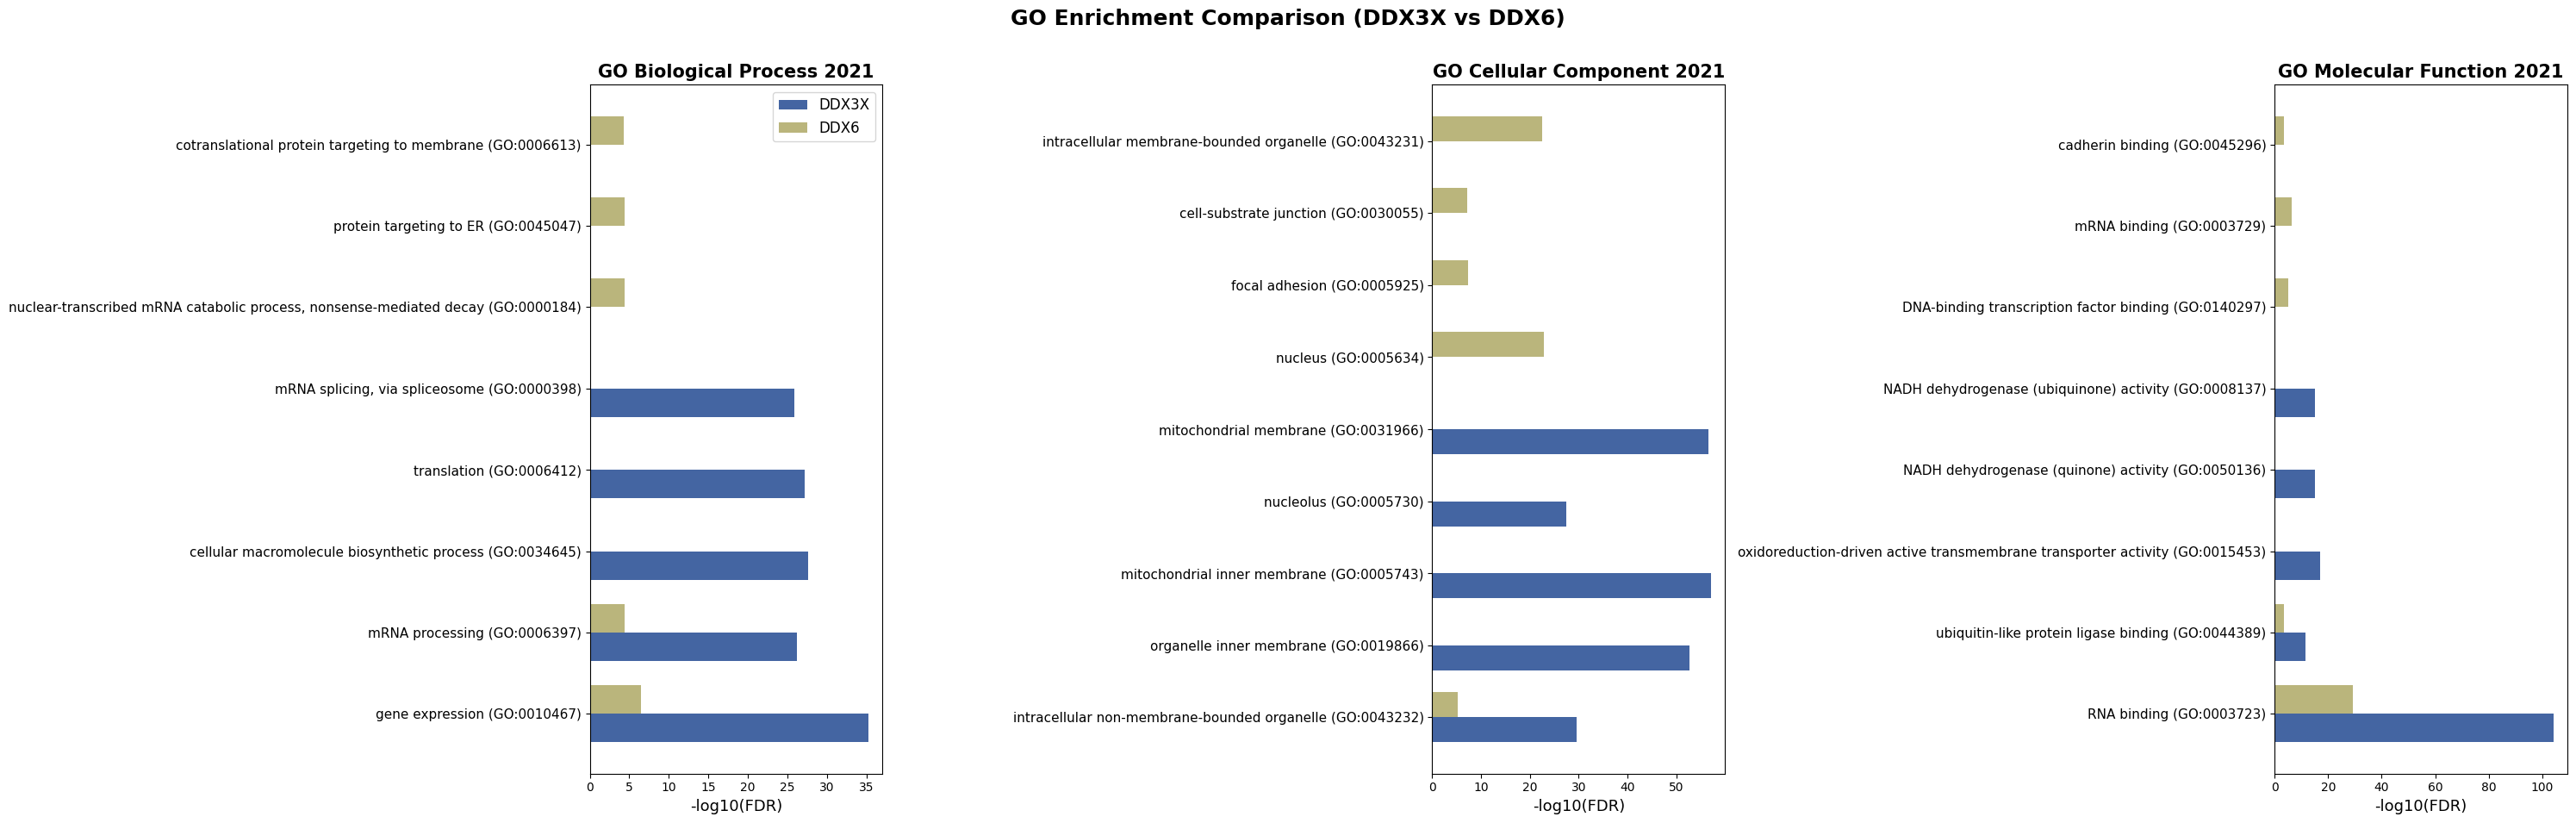

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ---- (0) 결과 요약: 각 카테고리별 summary dataframe을 리스트에 저장 ----
facet_titles = ['GO Biological Process 2021', 'GO Cellular Component 2021', 'GO Molecular Function 2021']
facet_data = []

topN = 5  # or 원하는 값

for cat in categories:
    key_ddx3x = f'DDX3X_{cat}'
    key_ddx6  = f'DDX6_{cat}'
    df_ddx3x = all_results[key_ddx3x]
    df_ddx6  = all_results[key_ddx6]
    term_col = 'Term'

    terms_ddx3x = set(df_ddx3x[term_col].head(topN))
    terms_ddx6  = set(df_ddx6[term_col].head(topN))

    common_terms = terms_ddx3x & terms_ddx6
    ddx3x_unique = terms_ddx3x - terms_ddx6
    ddx6_unique  = terms_ddx6 - terms_ddx3x

    summary = []
    for term in common_terms:
        row_x = df_ddx3x[df_ddx3x[term_col] == term].iloc[0]
        row_6 = df_ddx6[df_ddx6[term_col] == term].iloc[0]
        summary.append({
            "Term": term,
            "DDX3X FDR": row_x['Adjusted P-value'],
            "DDX6 FDR":  row_6['Adjusted P-value'],
            "Common/Unique": "Common"
        })
    for term in ddx3x_unique:
        row_x = df_ddx3x[df_ddx3x[term_col] == term].iloc[0]
        summary.append({
            "Term": term,
            "DDX3X FDR": row_x['Adjusted P-value'],
            "DDX6 FDR":  None,
            "Common/Unique": "DDX3X only"
        })
    for term in ddx6_unique:
        row_6 = df_ddx6[df_ddx6[term_col] == term].iloc[0]
        summary.append({
            "Term": term,
            "DDX3X FDR": None,
            "DDX6 FDR":  row_6['Adjusted P-value'],
            "Common/Unique": "DDX6 only"
        })
    facet_data.append(pd.DataFrame(summary))

# ---- (1) Facet plot: 3개 subplot ----
fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharex=False)

for i, (ax, df_summary, title) in enumerate(zip(axes, facet_data, facet_titles)):
    N = df_summary.shape[0]
    bar_width = 0.35
    ind = np.arange(N)
    fdr_x = -np.log10(df_summary["DDX3X FDR"].fillna(1))
    fdr_6 = -np.log10(df_summary["DDX6 FDR"].fillna(1))

    ax.barh(ind - bar_width/2, fdr_x, height=bar_width, label='DDX3X', color='#4465A2')
    ax.barh(ind + bar_width/2, fdr_6, height=bar_width, label='DDX6', color='#BAB57C')

    ax.set_yticks(ind)
    ax.set_yticklabels(df_summary['Term'], fontsize=11)
    ax.set_xlabel('-log10(FDR)', fontsize=13)
    ax.set_title(title.replace("_", " "), fontsize=15, fontweight='bold')
    if i == 0:
        ax.legend(fontsize=12)
    else:
        ax.legend().set_visible(False)

plt.suptitle('GO Enrichment Comparison (DDX3X vs DDX6)', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()
